# Vergelijking oplosmethodes #

![figuur 1](data/data_Vergelijking_methodes/Constructie.gif)

- [Krachten](#Krachten)
    - [Differentiaalvergelijking](#Differentiaalvergelijking)
    - [Evenwichtsvergelijkingen](#Evenwichtsvergelijkingen)
    - [Virtuele arbeid / virtuele verplaatsingenmethode](#Virtuelearbeid/virtueleverplaatsingenmethode)
- [Verplaatsingen](#Verplaatsingen)
    - [Differentiaalvergelijking](#Differentiaalvergelijking2)
    - [Momentenvlakstelling](#Momentenvlakstelling)
    - [Vergeet-me-nietjes](#Vergeet-me-nietjes)
    - [Virtuele krachtmethode / Castigliano](#Virtuelekrachtmethode/Castigliano)
    - [Potentiële energie](#Potentiëleenergie)

In [1]:
import sympy as sp

## <a id='Krachten'></a> Krachten ##

### <a id='Differentiaalvergelijking'></a>  Differentiaalvergelijking ###

$$q(x)= Am{\left\langle x \right\rangle ^{ - 2}} + Av{\left\langle x \right\rangle ^{ - 1}} + Bv{\left\langle {x - 6} \right\rangle ^{ - 1}} + F{\left\langle {x - 2.5} \right\rangle ^{ - 1}} + {q_0}$$
$$\eqalign{
  & V\left( x \right) =  - \int {q\left( x \right)dx}   \cr 
  & M\left( x \right) = \int {V\left( x \right)dx}   \cr 
  & M\left( 6 \right) = 0  \cr 
  & M\left( {2.5} \right) = 0 \cr} $$

In [2]:
x, q0, F= sp.symbols('x, q0, F')
q = q0 + sp.SingularityFunction(x,2.5,-1)*F
C1, C2 = sp.symbols('C1, C2')

V = -sp.integrate(q,x) + C1
M = sp.integrate(V,x) + C2
eq1 = sp.Eq(M.subs(x,6),0)
eq2 = sp.Eq(M.subs(x,2.5),0)
display(eq1)
display(eq2)
sol = sp.solve((eq1,eq2),(C1,C2))
display(sol)
M_sol = M.subs(sol)
M_subs = M_sol.subs(((F,50),(q0,5)))
A_m_1 = M_subs.subs(x,0)
M_subs_piecewise = sp.simplify(M_subs.rewrite(sp.Piecewise))
display(M_subs_piecewise)
display(A_m_1)

Eq(6*C1 + C2 - 3.5*F - 18*q0, 0)

Eq(2.5*C1 + C2 - 3.125*q0, 0)

{C1: F + 4.25*q0, C2: -2.5*F - 7.5*q0}

Piecewise((-2.5*x**2 + 21.25*x - 37.5, x > 2.5), (-2.5*x**2 + 71.25*x - 162.5, True))

-162.500000000000

### <a id='Evenwichtsvergelijkingen'></a> Evenwichtsvergelijkingen ###

![figuur 1](data/data_Vergelijking_methodes/Oplegreacties.gif)
$$\sum M_C : - Am - 2.5 Av - 3.125 q_{0} = 0 $$
$$\sum F_v : - Av - Bv - F - 6 q_{0} = 0 $$
$$\sum M_B : - Am - 6 Av - 3.5 F - 18 q_{0} = 0$$

In [3]:
Am, Av, Bv= sp.symbols('Am Av Bv')
q = sp.SingularityFunction(x,0,-2)*Am + sp.SingularityFunction(x,0,-1)*Av + q0 + sp.SingularityFunction(x,2.5,-1)*F + sp.SingularityFunction(x,6,-1)*Bv
display(q)

V = -sp.integrate(q,x)
M = sp.integrate(V,x)
eq3 = sp.Eq(M.subs(x,2.5),0)
eq4 = sp.Eq(V.subs(x,6),0)
eq5 = sp.Eq(M.subs(x,6),0)
display(eq3)
display(eq4)
display(eq5)
sol2 = sp.solve((eq3,eq4,eq5),(Am,Av,Bv))
display(sol2)
A_m_2 = sol2[Am].subs(((F,50),(q0,5)))
display(A_m_2)

Am*SingularityFunction(x, 0, -2) + Av*SingularityFunction(x, 0, -1) + Bv*SingularityFunction(x, 6, -1) + F*SingularityFunction(x, 2.5, -1) + q0

Eq(-Am - 2.5*Av - 3.125*q0, 0)

Eq(-Av - Bv - F - 6*q0, 0)

Eq(-Am - 6*Av - 3.5*F - 18*q0, 0)

{Am: 2.5*F + 7.5*q0, Av: -F - 4.25*q0, Bv: -1.75*q0}

162.500000000000

### <a id='Virtuelearbeid/virtueleverplaatsingenmethode'></a> Virtuele arbeidmethode / virtuele verplaatsingenmethode ###

![figuur 3](data/data_Vergelijking_methodes/Virtuele_arbeid.gif)
$$\delta A = 0 : \frac{A_m\delta u}{2.5} = 50\delta u+5\cdot2.5\cdot\frac{1}{2}\delta u+5\cdot3.5\cdot \frac{1}{2}\delta u$$

In [4]:
A_m_3 = 2.5*(50+5*2.5*0.5+5*3.5*0.5)
display(A_m_3)

162.5

## <a id='Verplaatsingen'></a>Verplaatsingen ##

In [5]:
M_sol = M.subs(sol2)
display(M_sol)
M_subs = M_sol.subs(((F,50),(q0,5)))
display(M_subs)
M_sol_piecewise = sp.simplify(M_sol.rewrite(sp.Piecewise))
display(M_sol_piecewise)
M_subs_piecewise = sp.simplify(M_subs.rewrite(sp.Piecewise))
display(M_subs_piecewise)

-F*SingularityFunction(x, 2.5, 1) - q0*x**2/2 + 1.75*q0*SingularityFunction(x, 6, 1) - (-F - 4.25*q0)*SingularityFunction(x, 0, 1) - (2.5*F + 7.5*q0)*SingularityFunction(x, 0, 0)

-5*x**2/2 - 162.5*SingularityFunction(x, 0, 0) + 71.25*SingularityFunction(x, 0, 1) - 50*SingularityFunction(x, 2.5, 1) + 8.75*SingularityFunction(x, 6, 1)

Piecewise((q0*(-0.5*x**2 + 6.0*x - 18.0), x > 6), (q0*(-0.5*x**2 + 4.25*x - 7.5), x > 2.5), (-2.5*F - q0*x**2/2 - 7.5*q0 + x*(F + 4.25*q0), x > 0), (-q0*x**2/2, True))

Piecewise((-2.5*x**2 + 30.0*x - 90.0, x > 6), (-2.5*x**2 + 21.25*x - 37.5, x > 2.5), (-2.5*x**2 + 71.25*x - 162.5, x > 0), (-5*x**2/2, True))

### <a id='Differentiaalvergelijking2'></a>Differentiaalvergelijking ###

$$\eqalign{
 & M\left( x \right) = \begin{cases} - 2.5 x^{2} + 21.25 x - 37.5 & \text{for}\: x > 2.5 \\- 2.5 x^{2} + 71.25 x - 162.5 & \text{for}\: x > 0 \end{cases}  \cr 
  & \kappa  = {M \over {EI}}  \cr 
  & \varphi  = \int {\kappa dx}  + {C_4}{\left\langle {x - 2.5} \right\rangle ^0}  \cr 
  & w =  - \int {\varphi dx}   \cr 
  & w\left( 0 \right) = 0  \cr 
  & \varphi \left( 0 \right) = 0  \cr 
  & w\left( 6 \right) = 6 \cr} $$

Eq(C3, 0)

Eq(C5, 0)

Eq(-6*C3 - 7*C4/2 + C5 + 31*F/38400 + 9*q0/5000, 0)

{C3: 0, C4: 31*F/134400 + 9*q0/17500, C5: 0}

Piecewise(((x**4 - 24*x**3 + 216*x**2 - 1360*x + 4272)/96000, x > 6), ((x**4 - 17*x**3 + 90*x**2 - 604*x + 2760)/96000, x > 5/2), (x**2*(x**2 - 57*x + 390)/96000, x > 0), (x**4/96000, True))

0.0165201822916667

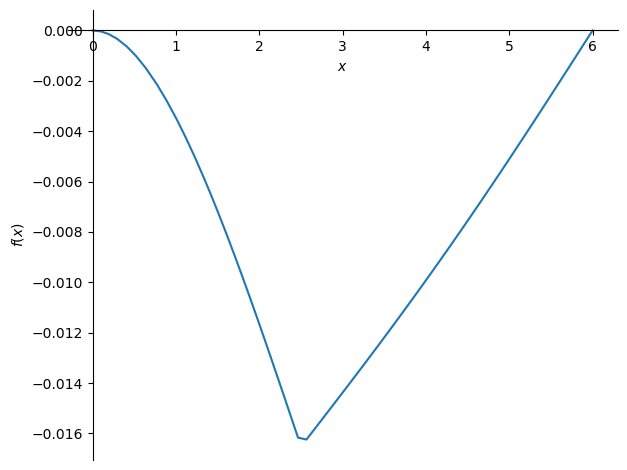

In [6]:
C3,C4,C5 = sp.symbols('C3, C4, C5')
kappa = sp.nsimplify(M_sol / sp.nsimplify(2e4))
phi = sp.integrate(kappa,x)+C3 + C4 * sp.SingularityFunction(x,sp.nsimplify(2.5),0)
w = -sp.integrate(phi,x)+C5
eq6 = sp.Eq(phi.subs(x,0),0)
eq7 = sp.Eq(w.subs(x,0),0)
eq8 = sp.Eq(w.subs(x,sp.S(6)),0)
display(eq6)
display(eq7)
display(eq8)
sol3 = sp.solve((eq6,eq7,eq8),(C3,C4,C5))
display(sol3)
w_sol = w.subs(sol3)
w_subs = w_sol.subs(((F,50),(q0,5)))
w_subs_piecewise = sp.simplify(w_subs.rewrite(sp.Piecewise))
w_C_1 = w_subs.subs(x,2.5)
display(w_subs_piecewise)
display(w_C_1)

sp.plot(-w_subs,(x,0,6))

### <a id='Momentenvlakstelling'></a>Momentenvlakstelling ###

![figuur 4](data/data_Vergelijking_methodes/Momentenvlakstelling.gif)

In [7]:
M_EI = M_sol_piecewise.args[2][0]/2e4
M_EI_subs = M_EI.subs([(F,50),(q0,5)])
display(M_EI_subs)

theta = sp.integrate(M_EI_subs,(x,0,2.5))
print("θ=",theta)
x_theta = sp.integrate(M_EI_subs*x,(x,0,2.5))/theta
print("x_θ=",x_theta)
w_C_5 = abs(theta)*(2.5-x_theta)
print("w_C=",w_C_5)

-0.000125*x**2 + 0.0035625*x - 0.008125

θ= -0.00983072916666667
x_θ= 0.819536423841060
w_C= 0.0165201822916667


### <a id='Vergeet-me-nietjes'></a>Vergeet-me-nietjes ###

![figuur 1](data/data_Vergelijking_methodes/VMNtjes.gif)

$${w_C} = {{q{l^4}} \over {8EI}} + {{F{l^3}} \over {3EI}}$$

In [8]:
w_C_4 = 5 * 2.5 **4 / (8 * 2e4) + (50+8.75)*2.5**3/(3*2e4)
print(w_C_4)

0.016520182291666664


### Strain energy ###

In [9]:
Ec = sp.integrate(M_subs_piecewise**2/(2*20e3),(x,0,6))
display(Ec)
kappa = -w_subs_piecewise.diff(x).diff(x)
display(kappa)
Ev = sp.integrate(20e3*kappa**2/2,(x,0,6))
display(Ev)

0.526925781250000

-Piecewise((x**2/8000 - 3*x/2000 + 9/2000, x > 6), (x**2/8000 - 17*x/16000 + 3/1600, x > 5/2), (x**2/24000 + x*(2*x - 57)/24000 - 19*x/16000 + 13/1600, x > 0), (x**2/8000, True))

0.526925781250000

### <a id='Virtuelekrachtmethode/Castigliano'></a>Virtuele krachtenmethode / Castigliano ###

$$ \text{Virtuele krachtenmethode} $$
$$  M\left( x \right) = \begin{cases} - 2.5 x^{2} + 21.25 x - 37.5 & \text{for}\: x > 2.5 \\- 2.5 x^{2} + 71.25 x - 162.5 & \text{for}\: x > 0 \end{cases}  $$
   
   
$$m(x):$$

![figuur 1](data/data_Vergelijking_methodes/Virtuele_kracht.gif)

$$\eqalign{
  & m\left( x \right) = \left\{ {\matrix{
   0 \hfill & {{\rm{for}}\>x > 2.5} \hfill  \cr 
   {x - 2.5} \hfill & {{\rm{for}}\>x > 0} \hfill  \cr 
   0 \hfill & {{\rm{otherwise}}} \hfill  \cr  } } \right.  \cr}$$

  
  
  
$$ \text{Castigliano} $$
$$ M\left( x, F, q_0 \right) = \left\{ {\matrix{
   {{q_0}\left( { - 0.5{x^2} + 4.25x - 7.5} \right)} & {{\rm{for}}\>x > 2.5}  \cr 
   { - 2.5F - {{{q_0}{x^2}} \over 2} - 7.5{q_0} + x\left( {F + 4.25{q_0}} \right)} & {{\rm{for}}\>x > 0}  \cr  } } \right. $$
   
$${{\partial M\left( x, F, q_0 \right)} \over {\partial F}} = \left\{ {\matrix{
   0 & {{\rm{for}}\>x > 2.5}  \cr 
   {x - 2.5} & {{\rm{for}}\>x > 0}  \cr  } } \right. $$
   
$$   {w_C} = \int_0^{2.5} {{{\partial M\left( x, F, q_0 \right)} \over {\partial F}}}{{M\left( x, F, q_0 \right)} \over {2 EI}} dx = \int_0^{2.5} {{{ m(x) M(x) } \over {2 EI}}} dx $$

$$ \text{Virtuele krachtenmethode & Castigliano} $$
 $$ w_C = \int_0^{2.5} {{{\left( {x - 2.5} \right)\left( { - 2.5{x^2} + 71.25x - 162.5} \right)} \over {2 \cdot {{10}^4}}}} dx$$

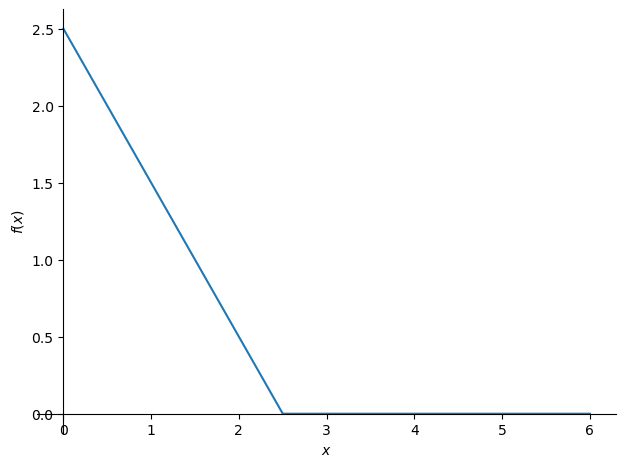

Piecewise((0, x > 2.5), (deltaF*(x - 2.5), x > 0), (0, True))

Piecewise((0, x > 2.5), (x - 2.5, x > 0), (0, True))

In [10]:
deltaF = sp.symbols('deltaF')
deltaq = sp.SingularityFunction(x,0,-2)*Am + sp.SingularityFunction(x,0,-1)*Av + sp.SingularityFunction(x,2.5,-1)*deltaF + sp.SingularityFunction(x,6,-1)*Bv
deltaV = -sp.integrate(deltaq,x)
deltaM = sp.integrate(deltaV,x)
eq9 = sp.Eq(deltaM.subs(x,2.5),0)
eq10 = sp.Eq(deltaV.subs(x,6),0)
eq11 = sp.Eq(deltaM.subs(x,6),0)
deltasol = sp.solve((eq9,eq10,eq11),(Am,Av,Bv))
deltaM_sol = deltaM.subs(deltasol)
deltaM_subs = deltaM_sol.subs(deltaF,1)
sp.plot(-deltaM_subs,(x,0,6))
deltaM_sol_piecewise = sp.simplify(deltaM_sol.rewrite(sp.Piecewise))
display(deltaM_sol_piecewise)
deltaM_subs_piecewise = sp.simplify(deltaM_subs.rewrite(sp.Piecewise))
display(deltaM_subs_piecewise)

In [11]:
w_C_2 = sp.integrate(deltaM_subs_piecewise.args[1][0]*M_subs_piecewise.args[2][0],(x,0,2.5)) / 2e4
display(w_C_2)

0.0165201822916667

In [12]:
w_C_3 = sp.integrate(M_sol_piecewise.args[2][0]*M_sol_piecewise.args[2][0].diff(F),(x,0,2.5))/2e4
display(w_C_3.subs(((F,50),(q0,5))))

0.0165201822916667

### <a id='Potentiëleenergie'></a>Potentiële energie ###

$$\eqalign{
  & {w_1} = {a_1}{x^4} + {a_2}{x^3} + {a_3}{x^2} + {a_4}x + {a_5} & {\rm{for 0}} \le x \le 2.5  \cr 
  & {w_2} = {b_1}{x^4} + {b_2}{x^3} + {b_3}{x^2} + {b_4}x + {b_5} & {\rm{for 2}}{\rm{.5}} \le x \le 6  \cr 
  & \left. \matrix{
  {w_1}\left( 0 \right) = 0 \hfill \cr 
  {\varphi _1}\left( 0 \right) = 0 \hfill \cr 
  {w_1}\left( {2.5} \right) = {w_2}\left( {2.5} \right) \hfill \cr 
  {w_2}\left( 6 \right) = 0 \hfill \cr}  \right\} \to {a_4},{a_5},{b_4},{b_5}  \cr 
  & \kappa  =  - {{{d^2}w} \over {d{x^2}}}  \cr 
  & V = \int_0^6 {{{EI{\kappa ^2}} \over 2}} dx - 50 \cdot w\left( {2.5} \right) - \int_0^6 {q \cdot w\left( x \right)} dx  \cr 
  & \left. \matrix{
  {{\partial V} \over {\partial {a_1}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {a_2}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {a_3}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {b_1}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {b_2}}} = 0 \hfill \cr 
  {{\partial V} \over {\partial {b_3}}} = 0 \hfill \cr}  \right\} \to {a_1},{a_2},{a_3},{b_1},{b_2},{b_3} \cr} $$

In [13]:
a,b,c,d,e = sp.symbols('a,b,c,d,e')
x = sp.symbols('x')
wAC = -a * sp.cos(sp.pi/sp.nsimplify(5)*x)+a
wBC = -b * sp.cos(sp.pi/sp.nsimplify(5)*x + c)

eq1 = sp.Eq(wBC.subs(x,6),0)
c_sol = sp.solve(eq1,c)
wBC = wBC.subs(c,c_sol[0])
eq2 = sp.Eq(wAC.subs(x,sp.nsimplify(2.5)),wBC.subs(x,sp.nsimplify(2.5)))
b_sol = sp.solve(eq2,b)[0]
wBC = sp.simplify(wBC.subs(b,b_sol))

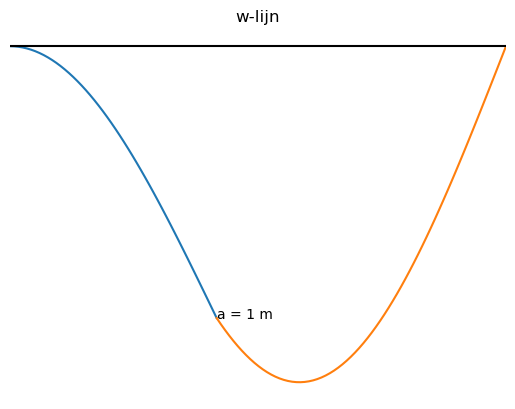

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x1_plot = np.linspace(0,  2.5, 50)
x2_plot = np.linspace(2.5, 6, 70)
w1_numpy = sp.lambdify(x, wAC.subs(a,1))
w2_numpy = sp.lambdify(x, wBC.subs(a,1))
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0 , color='black')
plt.xlim(0 , 6)
plt.annotate('a = %.0f m' % w1_numpy(2.5), xy = [2.5, w1_numpy(2.5)])
plt.axis('off');

In [15]:
display(-wAC.diff(x,2))
display(-wBC.diff(x,2))

Ev = 2e4/2*(sp.integrate((-wAC.diff(x,2))**2,(x,0,2.5))+sp.integrate((-wBC.diff(x,2))**2,(x,2.5,6)) )

display(sp.simplify(Ev))
display(Ev.evalf())

A = 50 * wAC.subs(x,2.5) + 5 * sp.integrate(wAC,(x,0,2.5)) + sp.integrate(5 * wBC,(x,2.5,6))

display(sp.simplify(A))
display(A.evalf())
V = sp.simplify(Ev - A)
eq1 = sp.nsimplify(sp.Eq(V.diff(a) ,0))
display(eq1.evalf())
sol = sp.solve(eq1,a)[0]
wAC_sol = wAC.subs(a,sol)
display(wAC_sol)
display(wAC_sol.subs(x,2.5).evalf())

-pi**2*a*cos(pi*x/5)/25

pi**2*a*(1 - sqrt(5))*cos(pi*(x/5 + 3/10))/25

pi**3*a**2*(-20.0*(1 - sqrt(5))**2*cos(1.1*pi) + 20.0*pi + 28.0*pi*(1 - sqrt(5))**2)

7016.4567061303*a**2

a*(-50 + (-25 + 25*sqrt(5))*sin(0.8*pi) + 25*sqrt(5) + 62.5*pi)/pi

70.1602110111666*a

Eq(14032.9134122606*a - 70.1602110111666, 0)

-25*(-4*sqrt(2) - sqrt(5 - sqrt(5)) + sqrt(5)*sqrt(5 - sqrt(5)) + 2*sqrt(10) + 5*sqrt(2)*pi)*cos(pi*x/5)/(8*pi**4*(5*(1 - sqrt(5))**2*sqrt(sqrt(5) + 5) + 10*sqrt(2)*pi + 14*sqrt(2)*pi*(1 - sqrt(5))**2)) + 25*(-4*sqrt(2) - sqrt(5 - sqrt(5)) + sqrt(5)*sqrt(5 - sqrt(5)) + 2*sqrt(10) + 5*sqrt(2)*pi)/(8*pi**4*(5*(1 - sqrt(5))**2*sqrt(sqrt(5) + 5) + 10*sqrt(2)*pi + 14*sqrt(2)*pi*(1 - sqrt(5))**2))

0.00499968958333823

In [16]:
a1, a2, a3, a4, a5, b1, b2, b3, b4, b5, x = sp.symbols('a1 a2 a3 a4 a5 b1 b2 b3 b4 b5 x')
w1 = a1 * x **4 + a2 * x **3 + a3 * x **2 + a4 * x + a5
w2 = b1 * x **4 + b2 * x **3 + b3 * x **2 + b4 * x + b5
phi1 = -w1.diff(x)
phi2 = -w2.diff(x)
eq1 = sp.Eq(w1.subs(x,0),0)
eq2 = sp.Eq(phi1.subs(x,0),0)
eq3 = sp.nsimplify(sp.Eq(w1.subs(x,2.5),w2.subs(x,2.5)))
eq4 = sp.nsimplify(sp.Eq(w2.subs(x,6),0))
sol = sp.solve((eq1,eq2,eq3,eq4),(a4,a5,b4,b5))
display(sol)
w1 = w1.subs(sol)
w2 = w2.subs(sol)

display(-w1.diff(x,2))
display(-w2.diff(x,2))

display(w1)
display(sp.nsimplify(w2))

E_v = 2e4/2*(sp.integrate(sp.nsimplify((-w1.diff(x,2))**2),(x,0,2.5))+sp.integrate((-w2.diff(x,2))**2,(x,2.5,6)) )
display(E_v)

E_p = 50 * w1.subs(x,2.5) + sp.integrate(sp.nsimplify(5 * w1),(x,0,2.5))+ sp.integrate(5 * w2,(x,2.5,6))
display(E_p)

V = E_v - E_p
eq5 = sp.Eq(V.diff(a1) ,0)
eq6 = sp.Eq(V.diff(a2) ,0)
eq7 = sp.Eq(V.diff(a3) ,0)
eq8 = sp.Eq(V.diff(b1) ,0)
eq9 = sp.Eq(V.diff(b2) ,0)
eq10 = sp.Eq(V.diff(b3) ,0)

sol = sp.solve((eq5,eq6,eq7,eq8,eq9,eq10),(a1,a2,a3,b1,b2,b3))
display(sol[a1])
display(sol[a2])
display(sol[a3])
display(sol[b1])
display(sol[b2])
display(sol[b3])

w1_sol=w1.subs(sol)
w2_sol=w2.subs(sol)
display(w1_sol)
display(w2_sol)
display(w1_sol.subs(x,2.5))

{a4: 0,
 a5: 0,
 b4: -625*a1/56 - 125*a2/28 - 25*a3/14 - 2873*b1/8 - 229*b2/4 - 17*b3/2,
 b5: 1875*a1/28 + 375*a2/14 + 75*a3/7 + 3435*b1/4 + 255*b2/2 + 15*b3}

-2*(6*a1*x**2 + 3*a2*x + a3)

-2*(6*b1*x**2 + 3*b2*x + b3)

a1*x**4 + a2*x**3 + a3*x**2

1875*a1/28 + 375*a2/14 + 75*a3/7 + b1*x**4 + 3435*b1/4 + b2*x**3 + 255*b2/2 + b3*x**2 + 15*b3 + x*(-625*a1/56 - 125*a2/28 - 25*a3/14 - 2873*b1/8 - 229*b2/4 - 17*b3/2)

28125000.0*a1**2 + 14062500.0*a1*a2 + 2500000.0*a1*a3 + 1875000.0*a2**2 + 750000.0*a2*a3 + 100000.0*a3**2 + 2211363000.0*b1**2 + 452497500.0*b1*b2 + 32060000.0*b1*b3 + 24045000.0*b2**2 + 3570000.0*b2*b3 + 140000.0*b3**2

2392.578125*a1 + 966.796875*a2 + 393.229166666667*a3 - 4003.453125*b1 - 455.546875*b2 - 35.7291666666667*b3

1.04166666666680e-5

-0.000593750000000008

0.00406250000000001

1.04166666666667e-5

-0.000177083333333333

0.000937500000000000

1.0416666666668e-5*x**4 - 0.000593750000000008*x**3 + 0.00406250000000001*x**2

1.04166666666667e-5*x**4 - 0.000177083333333333*x**3 + 0.0009375*x**2 - 0.00629166666666667*x + 0.02875

0.0165201822916667

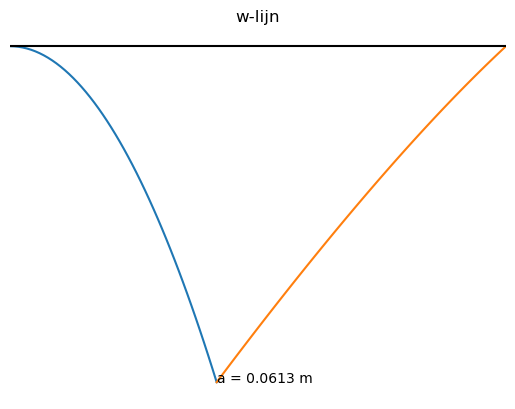

In [17]:
import numpy as np
import matplotlib.pyplot as plt
x1_plot = np.linspace(0,  2.5, 50)
x2_plot = np.linspace(2.5, 6, 70)
w1_numpy = sp.lambdify(x, w1.subs([(a1,1e-5),(a2,-1e-4),(a3,1e-2),(b1,1e-5),(b2,-1e-4),(b3,1e-3)]))
w2_numpy = sp.lambdify(x, w2.subs([(a1,1e-5),(a2,-1e-4),(a3,1e-2),(b1,1e-5),(b2,-1e-4),(b3,1e-3)]))
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0 , color='black')
plt.xlim(0 , 6)
plt.annotate('a = %.4f m' % w1_numpy(2.5), xy = [2.5, w1_numpy(2.5)])
plt.axis('off');

## Work method with Trial function

In [18]:
kappa1 = -sp.diff(wAC,x,2)
kappa2 = -sp.diff(wBC,x,2)
display(kappa1)
display(kappa2)
Ev1 = sp.integrate(sp.nsimplify(20e3*(-sp.diff(wAC,x,2))**2/2),(x,0,2.5))
#display(sp.simplify(sp.integrate(20e3*sp.diff(wAC,x,2)**2/2,(x))))
Ev2 = sp.integrate(sp.nsimplify(20e3*(-sp.diff(wBC,x,2))**2/2),(x,2.5,6))
#display(sp.simplify(sp.integrate(20e3*sp.diff(wBC,x,2)**2/2,(x))))
display(Ev1)
display(Ev2)
display(sp.simplify(Ev1+Ev2))
display((Ev1+Ev2).evalf())

A = 50 / 2 * wAC.subs(x,2.5) + 5 / 2*sp.integrate(wAC,(x,0,2.5)) + 5 / 2*sp.integrate(wBC,(x,2.5,6))
display(sp.simplify(A))
display(A.evalf())

Eq1 = sp.nsimplify(sp.Eq(A,Ev1+Ev2))
a_sol = sp.solve(Eq1,a)[1]
display(a_sol)
display(a_sol.evalf())
wAC.subs(a,a_sol).subs(x,2.5).evalf()

-pi**2*a*cos(pi*x/5)/25

pi**2*a*(1 - sqrt(5))*cos(pi*(x/5 + 3/10))/25

20.0*pi**4*a**2

-20*pi**3*a**2*(1 - sqrt(5))**2*cos(1.1*pi) + 28.0*pi**4*a**2*(1 - sqrt(5))**2

pi**3*a**2*(-20*(1 - sqrt(5))**2*cos(1.1*pi) + 20.0*pi + 28.0*pi*(1 - sqrt(5))**2)

7016.4567061303*a**2

a*(-25.0 + (-12.5 + 12.5*sqrt(5))*sin(0.8*pi) + 12.5*sqrt(5) + 31.25*pi)/pi

35.0801055055833*a

25*(-8 - sqrt(2)*sqrt(5 - sqrt(5)) + sqrt(10)*sqrt(5 - sqrt(5)) + 4*sqrt(5) + 10*pi)/(16*pi**4*(-28*sqrt(5)*pi - 5*sqrt(10)*sqrt(sqrt(5) + 5) + 15*sqrt(2)*sqrt(sqrt(5) + 5) + 94*pi))

0.00499968958333823

0.00499968958333823

## Rayleigh method ##

In [39]:
L_AB, L_CB = sp.symbols('L_AB, L_CB',real=True,nonzero=True)
w1 = - a * sp.cos(sp.pi*x/(2*L_AB)) + a 
w2 = a * (L_AB + L_CB) / L_CB -x * a / L_CB
display(w1)
display(w2)
display(w2.diff(x))
display(sp.integrate((w1.diff(x,2))**2,x))
display(sp.integrate((w1.diff(x))**2,(x,0,L_AB)) + sp.integrate((w2.diff(x))**2,(x,L_AB,L_AB+L_CB)))

-a*cos(pi*x/(2*L_AB)) + a

-a*x/L_CB + a*(L_AB + L_CB)/L_CB

-a/L_CB

pi**3*a**2*(sin(pi*x/(2*L_AB))*cos(pi*x/(2*L_AB))/2 + pi*x/(4*L_AB))/(8*L_AB**3)

-L_AB*a**2/L_CB**2 + a**2*(L_AB + L_CB)/L_CB**2 + pi**2*a**2/(8*L_AB)

In [38]:
EI = sp.symbols('EI')
buckling1 = EI*sp.integrate((w1.diff(x,2))**2,(x,0,L_AB)) / (sp.integrate((w1.diff(x))**2,(x,0,L_AB)) + sp.integrate((w2.diff(x))**2,(x,L_AB,L_AB+L_CB)))
buckling2 = EI*sp.integrate((w1.diff(x,2))**2,(x,0,L_AB)) / (sp.integrate((w1.diff(x))**2,(x,0,L_AB)))
display(buckling1)
display(sp.simplify(buckling1))
display(sp.simplify(buckling1).subs([(L_AB,2.5),(L_CB,3.5),(EI,20e3)]).evalf())
display(buckling2)
display(sp.simplify(buckling2).subs([(L_AB,2.5),(L_CB,3.5),(EI,20e3)]).evalf())

pi**4*EI*a**2/(32*L_AB**3*(-L_AB*a**2/L_CB**2 + a**2*(L_AB + L_CB)/L_CB**2 + pi**2*a**2/(8*L_AB)))

pi**4*EI*L_CB/(4*L_AB**2*(8*L_AB + pi**2*L_CB))

5000.50194465366

pi**2*EI/(4*L_AB**2)

7895.68352087149

In [25]:
w1 = sp.S(0)
w2 = a * sp.sin(sp.pi * (x-L_AB)/L_CB)
display(w1)
display(w2)

0

a*sin(pi*(-L_AB + x)/L_CB)

In [26]:
buckling = sp.simplify(EI*sp.integrate((w2.diff(x,2))**2,(x,L_AB,L_AB+L_CB)) / (sp.integrate((w2.diff(x))**2,(x,L_AB,L_AB+L_CB))))
display(buckling)
display(sp.simplify(buckling).subs([(L_AB,2.5),(L_CB,3.5),(EI,20e3)]).evalf())

pi**2*EI/L_CB**2

16113.6398385132